# What's in a Name
## 1. Introduction to Baby Names Data

In this project, you will explore the [baby names dataset](https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-national-level-data) compiled by the [Social Security Administration](https://www.ssa.gov). The data (name, year of birth, sex and number) are from a 100 percent sample of Social Security card applications after 1879. This dataset is a minehouse and contains lots of interesting stories to explore. In this project, you will explore some of these interesting stories around trendiness in names, and estimating a person's age from their name.

[How to uncompress zip-files](https://www.digitalocean.com/community/tutorials/working-with-data-using-pandas-and-python-3)

### 1.1 Uncompress Zip Archive

In [1]:
import zipfile

# Extract the zip file into datasets/names directory
zipfile.ZipFile('datasets/names.zip').extractall('datasets/names')

Now if you look back into your **datasets/names** directory, you’ll have .txt files of name data in CSV format. These files will correspond with the years of data on file, 1881 through 2015. Each of these files follow a similar naming convention. The 2015 file, for example, is called yob2015.txt, while the 1927 file is called yob1927.txt.

To look at the format of one of these files, let’s use Python to open one and display the top 5 lines:

In [2]:
open('datasets/names/yob2015.txt','r').readlines()[:5]

['Emma,F,20415\n',
 'Olivia,F,19638\n',
 'Sophia,F,17381\n',
 'Ava,F,16340\n',
 'Isabella,F,15574\n']

### 1.1.1 Load CSV Data into pandas

To load comma-separated values data into pandas we’ll use the pd.read_csv() function, passing the name of the text file as well as column names that we decide on. We’ll assign this to a variable, in this case names2015 since we’re using the data from the 2015 year of birth file.

In [3]:
import pandas as pd

bnames2015 = pd.read_csv('datasets/names/yob2015.txt', names = ['name', 'sex', 'births'])
bnames2015.head()

,name,sex,births
0,Emma,F,20415
1,Olivia,F,19638
2,Sophia,F,17381
3,Ava,F,16340
4,Isabella,F,15574


### 1.1.2 Concatenate pandas Objects

Concatenating pandas objects will allow us to work with all the separate text files within the datasets/names directory.

* To concatenate these, we’ll first need to initialize a list by assigning a variable to an unpopulated list data type

* Within the loop, we’ll append to the list each of the text file values, using a string formatter to handle the different names of each of these files. We’ll pass those values to the year variable. Again, we’ll specify columns for Name, Sex, and the number of births.

* Additionally, we’ll create a column for each of the years to keep those ordered. This we can do after each iteration by using the index of -1 to point to them as the loop progresses.

* Finally, we’ll add it to the pandas object with concatenation using the pd.concat() function. We’ll use the variable all_names to store this information.

In [4]:
all_years = []

for year in range(1880, 2015+1):
    all_years.append(pd.read_csv('datasets/names/yob{}.txt'.format(year),
                    names = ['name', 'sex', 'births']))
    all_years[-1]['year'] = year
    
bnames = pd.concat(all_years)

bnames.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


### 1.2 Getting the data from the DataCamp source (The content of this file names.csv.gz is slightly different than the original names.zip file from the SSA)

### Instructions

Welcome to your project! While working through the tasks in this project, please make sure to read the narrative for each task in the notebook on the right, before reading the more detailed instructions here!

In this task, you will read the data from the csv file **datasets/names.csv.gz** and save it as a **DataFrame** named **bnames**

* Import any additional libraries (e.g. pandas) that you might need.
* Inspect the first few rows of the data to make sure you have the read the data correctly.

If you print the first few rows of data, you should see a table resembling the one shown below.

![](img/01.png)

In [5]:
# Import modules
import pandas as pd

# Read names into a dataframe: bnames
bnames = pd.read_csv('datasets/names.csv.gz')
bnames.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


## 2. Exploring Trends in Names

One of the first things we want to do is to understand naming trends. Let us start by figuring out the top five most popular male and female names for this decade (born 2011 and later). Do you want to make any guesses? Go on, be a sport!!

### Instructions

Create a new **DataFrame** called **bnames_top5** with the top five male and female names of this decade.

* It should consist of the columns **sex**, **name**, and **births**.
* Make sure to **filter**, **group**, **aggregate**, and **sort** your data appropriately, such that the top five most common female names of the decade are displayed before the top five most common male names of the decade.
* Inspect your newly created **DataFrame** to make sure your analysis looks right.

If you print **bnames_top5**, you should see some rows that resemble the table shown below.

![](img/02.png)

Note that some characters in the table have been redacted on purpose, so that we don't give away the solution.

In [6]:
# bnames_top5: A dataframe with top 5 popular male and female names for the decade

# get the actual decade, born 2011 and later
bnames_2010 = bnames.loc[bnames['year'] > 2010]

# group the data and sum the births
bnames_2010_agg = bnames_2010.groupby(['sex', 'name'], as_index=False)['births'].sum()

# sort sex and births
bnames_top5 = bnames_2010_agg.sort_values(['sex', 'births'], 
                ascending=[True, False]).groupby('sex').head().reset_index(drop=True)

bnames_top5.head(5)

,sex,name,births
0,F,Emma,121375
1,F,Sophia,117352
2,F,Olivia,111691
3,F,Isabella,103947
4,F,Ava,94507


## 3. Proportion of Births

While the number of births is a useful metric, making comparisons across years becomes difficult, as one would have to control for population effects. One way around this is to normalize the number of births by the total number of births in that year.

### Instructions

Add a new column containing the proportion of births by year.

* Compute the proportion of births by dividing births by the total number of births in a year.
* Add it as a new column to the data frame bnames2, that is a copy of the original bnames data.
* Inspect the rows of bnames2 to ensure that you have it right. If you print a few rows of bnames2, you should see a table resembling the one shown below.

![](img/03.png)

Note that some characters in the table have been redacted on purpose, so that we don't give away the solution.

In [7]:
bnames2 = bnames.copy()

# Compute the proportion of births by year and add it as a new column
total_births_by_year = bnames.groupby('year')['births'].transform('sum')

bnames2['prop_births'] = bnames2['births'] / total_births_by_year
bnames2.head()

,name,sex,births,year,prop_births
0,Mary,F,7065,1880,0.035065
1,Anna,F,2604,1880,0.012924
2,Emma,F,2003,1880,0.009941
3,Elizabeth,F,1939,1880,0.009624
4,Minnie,F,1746,1880,0.008666


In [8]:
bnames2.tail()

,name,sex,births,year,prop_births
1891889,Zolton,M,5,2016,0.000001
1891890,Zurich,M,5,2016,0.000001
1891891,Zyahir,M,5,2016,0.000001
1891892,Zyel,M,5,2016,0.000001
1891893,Zylyn,M,5,2016,0.000001


## 4. Popularity of Names

Now that we have the proportion of births, let us plot the popularity of a name through the years. How about plotting the popularity of the female names Elizabeth, and Deneen, and inspecting the underlying trends for any interesting patterns!

### Instructions

It is best to write a function to plot the trends, so that we can keep our code [DRY](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself).

* Write a function named **plot_trends** that takes two arguments, **name** and **sex**, and plots the trend in number of **births** by year.
* Use the function to plot the popularity of the female names **Elizabeth** and **Deneen**.
* Inspect the plots for peaks and fill out the values of **num_peaks_elizabeth** and **num_peaks_deneen**.

Shown below is a snippet of the plot produced for a randomly selected name. This is provided here only to give you an idea of what is expected from the plotting function. Please make sure to label your axes and add an informative title.

![](img/04.png)

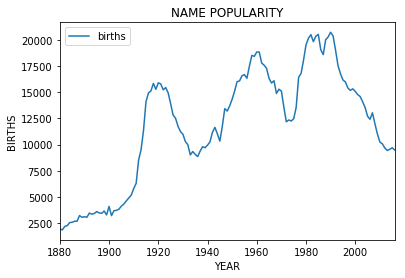

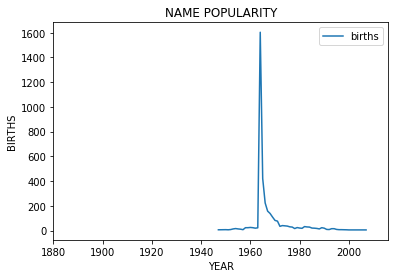

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_trends(name, sex):
    data = bnames[(bnames.name == name) & (bnames.sex == sex)]
    ax = data.plot(x = 'year', y = 'births')
    ax.set_xlim(1880, 2016)
    ax.set_xlabel('YEAR')
    ax.set_ylabel('BIRTHS')
    ax.set_title('NAME POPULARITY')
    return ax

for name in range(1):
    plot_trends('Elizabeth', 'F')
    plot_trends('Deneen', 'F')
    
# How many times did these female names peak? 
# ([PeakUtils](http://pythonhosted.org/PeakUtils/) seems to be an approbiate tool to detect the peaks)
num_peaks_elizabeth = 3
num_peaks_deneen    = 1

## 5. Trendy vs. Stable Names

Based on the plots we created earlier, we can see that **Elizabeth** is a fairly stable name, while **Deneen** is not. An interesting question to ask would be what are the top 5 stable and top 5 trendiest names. A stable name is one whose proportion across years does not vary drastically, while a trendy name is one whose popularity peaks for a short period and then dies down.

There are many ways to measure trendiness. A simple measure would be to look at the maximum proportion of births for a name, normalized by the sum of proportion of births across years. 

For example, if the name Joe had the proportions 0.1, 0.2, 0.1, 0.1, then the trendiness measure would be 0.2/(0.1 + 0.2 + 0.1 + 0.1) which equals 0.5.

Let us use this idea to figure out the top 10 trendy names in this data set, with at least a 1000 births.

### Instructions

Create a new **DataFrame** named **top10_trendy_names** that consists of the top 10 trendy names in the dataset with at least a 1000 births.

* The new data frame should include three new columns: **total**, **max** and **trendiness** for every **name** and **sex**.
* The **total** column should represent total number of births across all years.
* The **max** column should represent the maximum number of births in a year, across all years.
* The **trendiness** column is computed as the **max** divided by the **total**.
* Make sure to include only those names that have at least a 1000 births!

If you print the first few rows of your data frame, you should see a table resembling this:

![](img/05.png)

Note that some characters in the table have been redacted on purpose, so that we don't give away the solution.

In [10]:
# top10_trendy_names | A Data Frame of the top 10 most trendy names
names = pd.DataFrame()
name_and_sex_grouped = bnames.groupby(['name', 'sex'])
names['total'] = name_and_sex_grouped['births'].sum()
names['max'] = name_and_sex_grouped['births'].max()
names['trendiness'] = names['max'] / names['total']
top10_trendy_names = names.loc[names['total'] > 999].sort_values('trendiness', ascending=False).head(10).reset_index()
top10_trendy_names.head(10)

,name,sex,total,max,trendiness
0,Christop,M,1082,1082,1.000000
1,Royalty,F,1057,581,0.549669
2,Kizzy,F,2325,1116,0.480000
3,Aitana,F,1203,564,0.468828
4,Deneen,F,3602,1604,0.445308
5,Moesha,F,1067,426,0.399250
6,Marely,F,2527,1004,0.397309
7,Kanye,M,1304,507,0.388804
8,Tennille,F,2172,769,0.354052
9,Kadijah,F,1411,486,0.344437


## 6. Bring in Mortality Data

So, what more is in a name? Well, with some further work, it is possible to predict the age of a person based on the name (Whoa! Really????). For this, we will need actuarial data that can tell us the chances that someone is still alive, based on when they were born. Fortunately, the [SSA](https://www.ssa.gov/) provides detailed [actuarial life tables](https://www.ssa.gov/oact/STATS/table4c6.html) by birth cohorts.

![](img/06.png)

You can read the [documentation for the lifetables](https://www.ssa.gov/oact/NOTES/as120/LifeTables_Body.html) to understand what the different columns mean. The key column of interest to us is **lx**, which provides the number of people born in a year who live upto a given age. The probability of being alive can be derived as **lx by 100,000**.

Given that 2016 is the latest year in the baby names dataset, we are interested only in a subset of this data, that will help us answer the question, **"What percentage of people born in Year X are still alive in 2016?"**

Let us use this data and plot it to get a sense of the mortality distribution!

### Instructions

We have already scraped the actuarial tables and made them available as **datasets/lifetables.csv**. In this task, you will:

* Create a data frame named **lifetables** by reading **lifetables.csv**.
* Extract a subset of this data frame named **lifetables_2016**, that contains rows where **year** and **age** add up to 2016, as these are the rows relevant to answer the question of interest.
* Plot **lx** vs **year** to get a sense of the mortality distribution in **lifetables_2016**.

If you print a few rows of the data frame, you should see a table resembling the one shown below.

![](img/061.png)

In [11]:
# Read lifetables from datasets/lifetables.csv
lifetables = pd.read_csv('datasets/lifetables.csv')

# Extract subset relevant to those alive in 2016
lifetables_2016 = lifetables[lifetables['year'] + lifetables['age'] == 2016]
lifetables_2016.head()

,year,age,qx,lx,dx,Lx,Tx,ex,sex
116,1900,116,0.83363,0.0,0,0,0,0.69,M
236,1900,116,0.83363,0.0,0,0,0,0.69,F
346,1910,106,0.51178,7.0,3,5,9,1.38,M
466,1910,106,0.47062,61.0,29,47,92,1.52,F
576,1920,96,0.30765,1625.0,500,"1,375","4,000",2.46,M


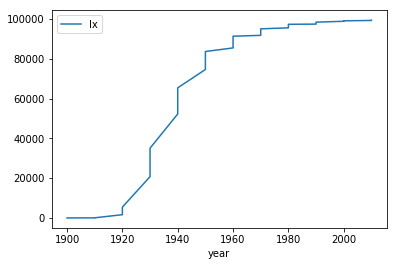

In [12]:
# Plot the mortality distribution: year vs. lx
lifetables_2016.plot(x='year', y='lx');

## 7. Smoothen the Curve!

We are almost there. There is just one small glitch. The cohort life tables are provided only for every decade. In order to figure out the distribution of people alive, we need the probabilities for every year. One way to fill up the gaps in the data is to use some kind of interpolation. Let us keep things simple and use linear interpolation to fill out the gaps in values of **lx**, between the years **1900** and **2016**.

### Instructions

* Create a new data frame **lifetable_2016_s** from **lifetables** that consists of years from 1900 to 2010.
* Linearly interpolate values of **lx**, where they are missing. You might want to use the **.interpolate** function from **pandas**.

If you print the first few rows of **lifetable_2016_s**, you should see a table that resembles

![](img/07.png)



In [13]:
import numpy as np
year = np.arange(1900, 2016)
year

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015])

In [14]:
# Create smoothened lifetable_2016_s by interpolating values of lx
year = np.arange(1900, 2016)
mf = {"M": pd.DataFrame(), "F": pd.DataFrame()}
for sex in ["M", "F"]:
    d = lifetables_2016[lifetables_2016['sex'] == sex][["year", "lx"]]
    mf[sex] = d.set_index('year').reindex(year).interpolate().reset_index()
    mf[sex]['sex'] = sex

lifetable_2016_s = pd.concat(mf, ignore_index = True)
lifetable_2016_s.head()    

,year,lx,sex
0,1900,0.0,F
1,1901,6.1,F
2,1902,12.2,F
3,1903,18.3,F
4,1904,24.4,F


## 8. Distribution of People Alive by Name

Now that we have all the required data, we need a few helper functions to help us with our analysis.

The first function we will write is **get_data**, which takes name and sex as inputs and returns a data frame with the distribution of number of births and number of people alive by year.

The second function is **plot_name** which accepts the same arguments as get_data, but returns a line plot of the distribution of number of births, overlaid by an area plot of the number alive by year.

Using these functions, we will plot the distribution of births for boys named **Joseph** and girls named **Brittany**.

### Instructions

In this task, you will write two functions: **get_data**, and **plot_name**.

get_data

* The **get_data** function should takes name and sex as inputs and returns a **DataFrame**.
* It should consist of the number of births (**births**) and number of people alive (**n_alive**) by year, for each name. - - One way to accomplish this is to merge the **lifetable_2016_s** data with **bnames**, and computing the number of people alive by multiplying **lx** and **births** and dividing the result by 100,000.
* If you run **get_data("Joseph", "M")**, you should get a **DataFrame**, with the following columns. Your values for **lx** and **n_alive** might vary from the values shown above, depending on how you interpolated your lifetables. That is fine and will not lead to any issues during testing.

![](img/08.png)

plot_name

* The **plot_name** function should plot the data frame to display the distribution of births and number living.
* You might want to look at using the **plot** methods in **pandas** to do this.
* The plot for girls named **Brittany** should look somewhat like the plot shown below. Your actual plot might look a little different based on how you interpolated the data.

![](img/081.png)

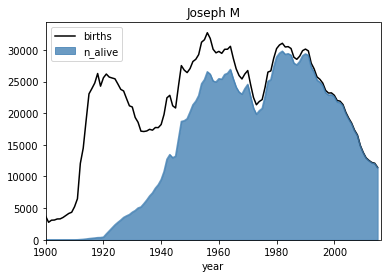

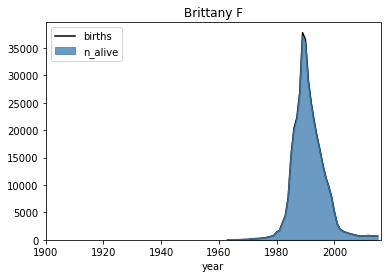

In [15]:
def get_data(name, sex):
    name_sex = ((bnames['name'] == name) & 
                (bnames['sex'] == sex))
    data = bnames[name_sex].merge(lifetable_2016_s)
    data['n_alive'] = data['lx']/(10**5)*data['births']
    return data
    

def plot_data(name, sex):
    fig, ax = plt.subplots()
    dat = get_data(name, sex)
    dat.plot(x = 'year', y = 'births', ax = ax, 
               color = 'black', title = name + ' ' + sex)
    dat.plot(x = 'year', y = 'n_alive', 
              kind = 'area', ax = ax, 
              color = 'steelblue', alpha = 0.8)
    ax.set_xlim(1900, 2016)
    
    return 
    
# Plot the distribution of births and number alive for Joseph and Brittany
for p in range(1):
    plot_data('Joseph', 'M')
    plot_data('Brittany', 'F')

## 9. Estimate Age

In this section, we want to figure out the probability that a person with a certain name is alive, as well as the quantiles of their age distribution. In particular, we will estimate the age of a female named **Gertrude**. Any guesses on how old a person with this name is? How about a male named **William**?

### Instructions

In this task, you will:

* Write a function named **estimate_age** that accepts two arguments **name** and **sex**.
* It should returns a **pd.Series** object with the indices **name**, **p_alive** (probability of being alive), **q25**, **q50** and **q75** (age quantiles).
* As we are dealing with weighted data, you might want to use the **quantile** function from the **wquantiles** module to compute the quantiles. Note that the **quantile** function, accepts a data array and a weights array.
* Use this function to estimate the age of **Gertrude**.

If you call the function **estimate_age** with a specific **name** and **sex**, your output should resemble something like this:

![](img/09.png)

In [16]:
# %load wquantiles.py
"""
Library to compute weighted quantiles, including the weighted median, of
numpy arrays.
"""
from __future__ import print_function
import numpy as np

__version__ = "0.4"


def quantile_1D(data, weights, quantile):
    """
    Compute the weighted quantile of a 1D numpy array.

    Parameters
    ----------
    data : ndarray
        Input array (one dimension).
    weights : ndarray
        Array with the weights of the same size of `data`.
    quantile : float
        Quantile to compute. It must have a value between 0 and 1.

    Returns
    -------
    quantile_1D : float
        The output value.
    """
    # Check the data
    if not isinstance(data, np.matrix):
        data = np.asarray(data)
    if not isinstance(weights, np.matrix):
        weights = np.asarray(weights)
    nd = data.ndim
    if nd != 1:
        raise TypeError("data must be a one dimensional array")
    ndw = weights.ndim
    if ndw != 1:
        raise TypeError("weights must be a one dimensional array")
    if data.shape != weights.shape:
        raise TypeError("the length of data and weights must be the same")
    if ((quantile > 1.) or (quantile < 0.)):
        raise ValueError("quantile must have a value between 0. and 1.")
    # Sort the data
    ind_sorted = np.argsort(data)
    sorted_data = data[ind_sorted]
    sorted_weights = weights[ind_sorted]
    # Compute the auxiliary arrays
    Sn = np.cumsum(sorted_weights)
    # TODO: Check that the weights do not sum zero
    #assert Sn != 0, "The sum of the weights must not be zero"
    Pn = (Sn-0.5*sorted_weights)/np.sum(sorted_weights)
    # Get the value of the weighted median
    return np.interp(quantile, Pn, sorted_data)


def quantile(data, weights, quantile):
    """
    Weighted quantile of an array with respect to the last axis.

    Parameters
    ----------
    data : ndarray
        Input array.
    weights : ndarray
        Array with the weights. It must have the same size of the last 
        axis of `data`.
    quantile : float
        Quantile to compute. It must have a value between 0 and 1.

    Returns
    -------
    quantile : float
        The output value.
    """
    # TODO: Allow to specify the axis
    nd = data.ndim
    if nd == 0:
        TypeError("data must have at least one dimension")
    elif nd == 1:
        return quantile_1D(data, weights, quantile)
    elif nd > 1:
        n = data.shape
        imr = data.reshape((np.prod(n[:-1]), n[-1]))
        result = np.apply_along_axis(quantile_1D, -1, imr, weights, quantile)
        return result.reshape(n[:-1])


def median(data, weights):
    """
    Weighted median of an array with respect to the last axis.

    Alias for `quantile(data, weights, 0.5)`.
    """
    return quantile(data, weights, 0.5)


In [17]:
# import modules
# from wquantiles import quantile --> does not work properly to install, so just use the downloaded wquantiles.py file


# Function to estimate age quantiles
def estimate_age(name, sex):
    data = get_data(name, sex)
    qs = [0.75, 0.5, 0.25]
    quantiles = [2016 - int(quantile(data.year, data.n_alive, q)) for q in qs]
    result = dict(zip(['q25', 'q50', 'q75'], quantiles))
    result['p_alive'] = round(data.n_alive.sum()/data.births.sum()*100, 2)
    result['sex'] = sex
    result['name'] = name
    return pd.Series(result)
# Estimate the age of Gertrude
estimate_age('Gertrude', 'F')

name       Gertrude
p_alive       18.73
q25              70
q50              80
q75              89
sex               F
dtype: object

## 10. Median Age of Top 10 Female Names

In the previous section, we estimated the age of a female named Gertrude. Let's go one step further this time, and compute the 25th, 50th and 75th percentiles of age, and the probability of being alive for the top 10 most common female names of all time. This should give us some interesting insights on how these names stack up in terms of median ages!

### Instructions

* Extract the top 10 female names of all time from the **bnames** dataset.
* Use the **estimate_age** function on each of the 10 names to create a **DataFrame** named **median_ages**
* **median_ages** should contain the columns: **name**, **p_alive**, **q25**, **q50**, **q75** and **sex**.
* Make sure to sort the resulting data frame by the median age **q50**.

In [18]:
# Create median_ages: DataFrame with Top 10 Female names, 
#    age percentiles and probability of being alive

top_10_female_names = bnames.\
  groupby(['name', 'sex'], as_index = False).\
  agg({'births': np.sum}).\
  sort_values('births', ascending = False).\
  query('sex == "F"').\
  head(10).\
  reset_index(drop = True)
estimates = pd.concat([estimate_age(name, 'F') for name in top_10_female_names.name], axis = 1)
median_ages = estimates.T.sort_values('q50').reset_index(drop = True)
median_ages.head()

,name,p_alive,q25,q50,q75,sex
0,Sarah,86.05,20,30,38,F
1,Elizabeth,74.49,23,38,58,F
2,Jennifer,96.35,31,38,44,F
3,Susan,85.8,52,59,65,F
4,Patricia,76.75,54,63,71,F
